# Import Libraries

In [21]:
import os
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from src.data_loader.data_set import Data_Set
from src.data_loader.freihand_loader import F_DB
from src.constants import MASTER_THESIS_DIR, FREIHAND_DATA
from src.utils import read_json
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import copy
from easydict import EasyDict as edict
from src.utils import read_json
from src.visualization.visualize import plot_hand
from PIL import Image
import cv2
from src.data_loader.data_set import Data_Set
from src.experiments.utils import prepare_name

# Read data

In [174]:
config = edict(read_json(f"{MASTER_THESIS_DIR}/src/experiments/config/training_config.json"))
config.augmentation_flags.random_crop = False 
config.augmentation_flags.crop = True
config.augmentation_flags.color_jitter = False
config.augmentation_flags.cut_out = False
config.augmentation_flags.resize = True
config.augmentation_flags.color_drop = False
config.augmentation_flags.gaussian_blur =False
config.augmentation_flags.rotate = False
config.augmentation_flags.sobel_filter = False
config.augmentation_flags.gaussian_noise = False
config.augmentation_params.crop_box_jitter =[0,0]
f_db = Data_Set(config=config, transform=None, experiment_type="supervised", split="test")

# Define image augmenters

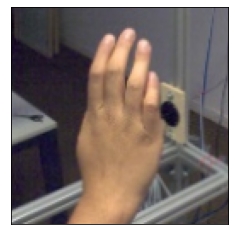

In [177]:
plt.imshow(f_db[136]["image"])
plt.xticks([])
plt.yticks([])
plt.savefig(prepare_name("orig2", config)+".png",dpi=200, bbox_inches="tight",) 

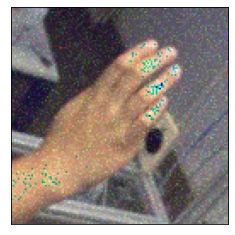

In [190]:
config.augmentation_flags.random_crop = False 
config.augmentation_flags.crop = True
config.augmentation_flags.color_jitter = False
config.augmentation_flags.cut_out = False
config.augmentation_flags.resize = True
config.augmentation_flags.color_drop = False
config.augmentation_flags.gaussian_blur =False
config.augmentation_flags.rotate = True
config.augmentation_flags.sobel_filter = False
config.augmentation_flags.gaussian_noise = True
config.augmentation_params.crop_box_jitter =[0,25]
f_db = Data_Set(config=config, transform=None, experiment_type="supervised", split="test")
plt.imshow(f_db[136]["image"])
plt.xticks([])
plt.yticks([])
plt.savefig(prepare_name("orig2", config)+".png",dpi=200,bbox_inches="tight",) 